In [1]:
from pathlib import Path

In [3]:
# point to audra directory
base_dir = Path('../../../../data/others/audra/')
draw_dir = base_dir / 'drawings'
!ls {draw_dir}

far_generalization_images       rater_generalization_one_images
primary_images                  rater_generalization_two_images


In [10]:
draw_dir.is_dir()

True

# Create blank tasks images

Overlay all responses. This assumes that the image placement is consistent.

  0%|          | 0/97 [00:00<?, ?it/s]

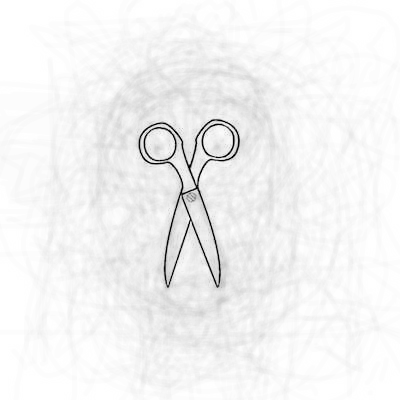

In [42]:
import numpy as np
from tqdm.auto import tqdm
from PIL import Image

def average_images(image_paths):
    images = []
    size = None
    images_np = []
    for path in tqdm(image_paths):
        im = Image.open(path)
        if not size:
            size = im.size
        im = im.resize(size)
        images_np.append(np.array(im))
    
    # average all images and convert to a PIL image
    avg_img_np = np.mean(images_np, axis=0)
    avg_img = Image.fromarray(np.uint8(avg_img_np))
    return avg_img

test_dir = draw_dir / 'far_generalization_images/Images_7'
impaths = list(test_dir.glob('*jpg'))
avg_im = average_images(impaths)
avg_im

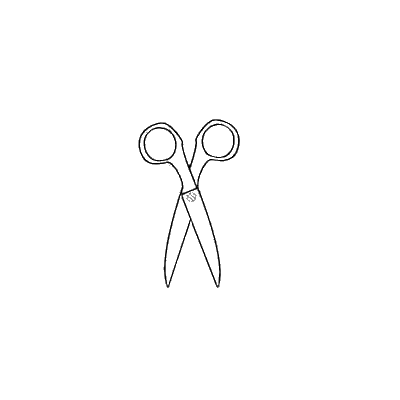

In [43]:
def clean_avg_im(im, threshold=180):
    a = np.array(im)
    a[a > threshold] = 255
    return Image.fromarray(a)
clean_avg_im(avg_im)

In [15]:
for impath in image_dir.glob('*jpg'):
    print(impath)
    break

../../../../data/others/audra/drawings/far_generalization_images/Images_7/O7_187.jpg


Run for all images, saving the averaged image, and the clean 'blank' prompt.

The averaged image is saved just because it looks cool - no practical value other than communicating the process.

In [46]:
task_dir / f"{image_name}_avg.png" 

PosixPath('../../../../data/others/audra/drawings/far_generalization_images/Images_7_avg.png')

In [ ]:
for task_dir in draw_dir.iterdir():
    task = task_dir.name
    if not task_dir.is_dir():
        continue
    for image_dir in task_dir.iterdir():
        if not image_dir.is_dir():
            continue
        image_name = image_dir.name

        impaths = list(image_dir.glob('*g'))
        avg_im = average_images(impaths)
        avg_im.save(task_dir / f"{image_name}_avg.png")

        blank_im = clean_avg_im(avg_im, 140)
        display(blank_im)
        print(task_dir / f"{image_name}_blank.png")
        blank_im.save(task_dir / f"{image_name}_blank.png")
    #print(task_dir)
    #!ls {task_dir}

### Fixes

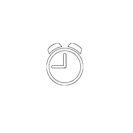

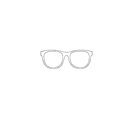

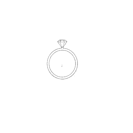

In [100]:
# redo tests where the threshold was off
redo = [
    ('../../../../data/others/audra/drawings/far_generalization_images/Images_1_blank.png', 180),
    ('../../../../data/others/audra/drawings/far_generalization_images/Images_3_blank.png', 190),
    ('../../../../data/others/audra/drawings/far_generalization_images/Images_5_blank.png', 190),
]

# todo ignore rater_generalization_two_images for now, which follows a different format
# '../../../../data/others/audra/drawings/rater_generalization_two_images/subset_2_blank.png',
# '../../../../data/others/audra/drawings/rater_generalization_two_images/subset_1_blank.png'

for path, threshold in redo:
    fpath = Path(path)
    avg_im = Image.open(fpath.parent / fpath.name.replace('blank', 'avg'))
    blank_im = clean_avg_im(avg_im, threshold)
    display(blank_im.resize((blank_im.width//3, blank_im.height//3)))
    blank_im.save(path)